In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
file_name = '20200310012841.csv'

In [3]:
df_timeseries = pd.read_csv(file_name)
df_timeseries.head()

,gdp
0,2.5
1,2.1
2,2.3
3,2.2
4,3.2


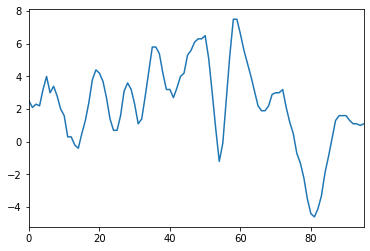

In [4]:
df_timeseries['gdp'].plot()

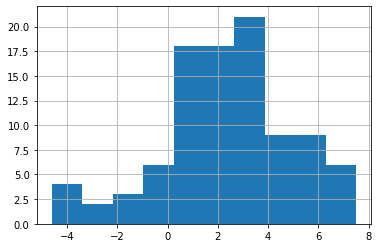

In [5]:
df_timeseries['gdp'].hist()

/home/ats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


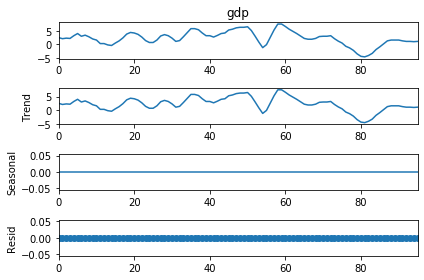

In [6]:
result = seasonal_decompose(df_timeseries['gdp'], model='additive', freq=1)
result.plot()
plt.show()

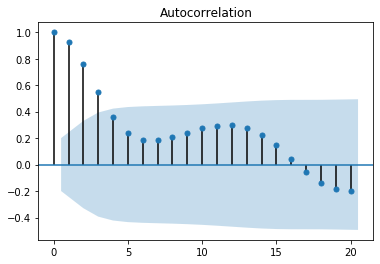

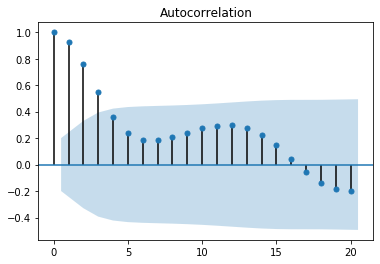

In [7]:
plot_acf(df_timeseries['gdp'])

(36,)
Mean squared error (TRAIN): 0.21
Mean absolute error (TRAIN): 0.37
Coefficient of determination (TRAIN): 0.95
Mean squared error (TEST): 0.29
Mean absolute error (TEST): 0.42
Coefficient of determination (TEST): 0.96


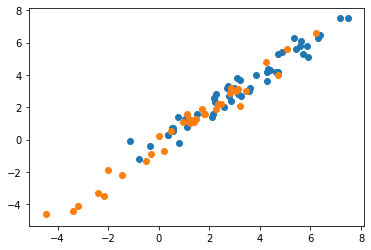

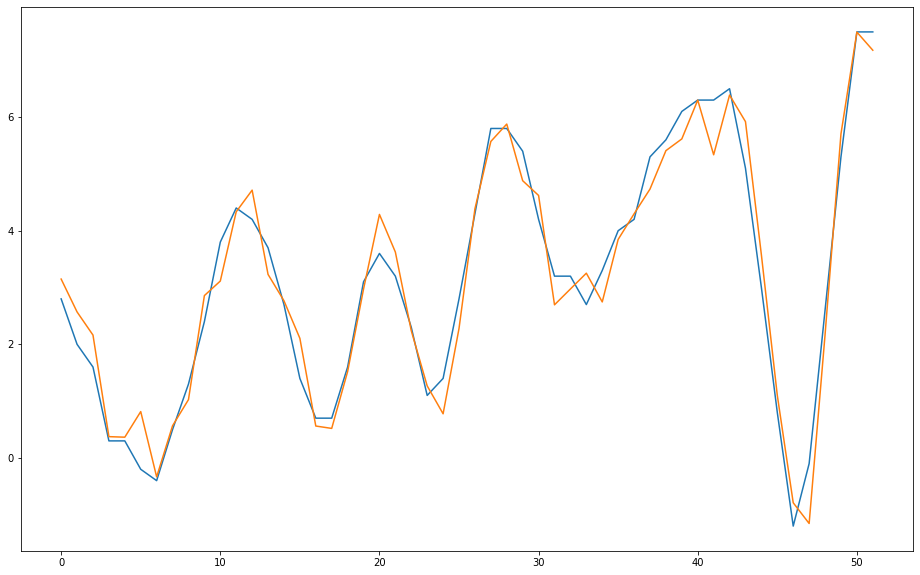

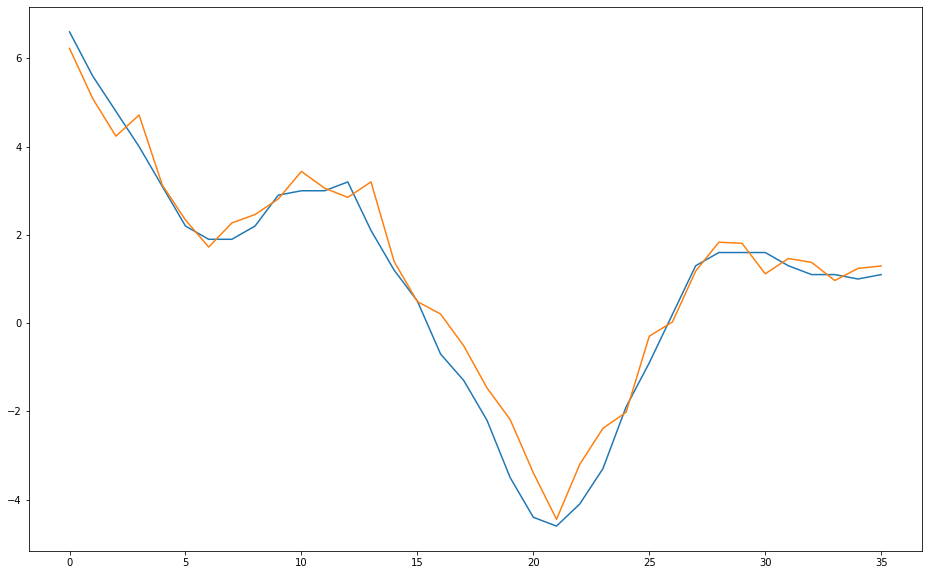

In [10]:
df = DataFrame()
df['t'] = df_timeseries['gdp']
lags = 8
longterm = 0
for l in range(1, lags+1):    
    df['t-'+str(l)] = df['t'].shift(l)
df = df.iloc[lags:]
for l in range(0, df.shape[0]):
    if (l + longterm > df.shape[0]-1):
        df['t'].iloc[l] = None
    else:
        df['t'].iloc[l] = df['t'].iloc[l + longterm]
df = df[~df['t'].isnull()]

X = df.iloc[:, 1:df.shape[1]] 
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

regr = linear_model.LinearRegression()
#regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_test)

#print('Coefficients: \n', regr.coef_)
print(y_test.shape)
print('Mean squared error (TRAIN): %.2f' % mean_squared_error(y_train, y_pred_train))
print('Mean absolute error (TRAIN): %.2f' % mean_absolute_error(y_train, y_pred_train))
print('Coefficient of determination (TRAIN): %.2f' % r2_score(y_train, y_pred_train))
print('Mean squared error (TEST): %.2f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error (TEST): %.2f' % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination (TEST): %.2f' % r2_score(y_test, y_pred))

plt.scatter(y_pred_train, y_train)
plt.scatter(y_pred, y_test)

fig = plt.figure(figsize=(16, 10))
ax = plt.axes()
ax.plot(y_train.to_numpy())
ax.plot(y_pred_train)

fig = plt.figure(figsize=(16, 10))
ax = plt.axes()
ax.plot(y_test.to_numpy())
ax.plot(y_pred)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, shuffle=False)
X_lt = X_test.iloc[0]
y_lt = regr.predict(X_lt.values.reshape(1, -1))
print(y_lt)
for i in range(0, y_test.shape[0]-1):
    X_lt = X_lt.shift(periods=1) 
    X_lt['t-1'] = y_lt
    y_lt = regr.predict(X_lt.values.reshape(1, -1))
    print(y_lt)

[1.87015747]
[2.4547093]
[2.59738326]
[2.58344894]
[2.68421075]
[2.60849185]
[2.77894627]
[2.93417405]
